In [2]:
%load_ext autoreload
%autoreload 2

# Business-as-usual analysis

In [3]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from ema_workbench import load_results
from unbreakable.analysis.analyzer import *
from unbreakable.analysis.visualizer import *
sns.set_theme(style="ticks")

In [4]:
# Parameters for report writing
savefig = True
savetab = False

## Load results

In [5]:
# Load results
n_scenarios = 3000
n_policies = 0
results = load_results(f'../experiments/scenarios={n_scenarios}, policies={n_policies}.tar.gz')

# Prepare outcomes
outcomes = prepare_outcomes(results, add_uncertainties=False, add_policies=False)

## EDA

### Single scenario, single district 

In [7]:
# Print all outcomes for a single scenario
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('district', inplace=True)
df.drop(columns=['weighted_vuln_quint', 'weighted_vuln_dec'], inplace=True)
numeric_columns = df.columns[3:-1].tolist()
df[numeric_columns].round(2).style.format("{:,.2f}")

,total_population,total_asset_loss,total_consumption_loss,tot_exposed_asset,tot_asset_surv,expected_loss_frac,n_affected_people,annual_average_consumption,poverty_line_adjusted,district_pml,n_poor_initial,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_average_consumption_loss,annual_average_consumption_loss_pct,mean_recovery_rate,r,n_new_poor_increase_pp
district,,,,,,,,,,,,,,,,,,,,,
Anse-La-Raye & Canaries,"8,666.91","1,272,573.26","902,783.85","47,442,177.05","334,331,195.84",0.03,670.29,"1,591.22",914.27,"1,282,936.18","3,292.00",147.00,7.00,32.85,33.06,33.00,134.69,8.40,0.15,0.26,0.08
Castries,"70,959.09","32,014,222.78","23,240,494.87","1,587,405,663.34","3,435,721,049.12",0.02,"4,450.91","6,213.45","2,976.86","31,062,668.40","15,948.00",934.00,264.00,34.78,35.07,34.57,522.15,7.80,0.18,2.32,0.37
Choiseul,"5,475.87","1,092,350.60","857,413.48","54,354,802.37","377,890,219.98",0.02,459.05,"1,932.86",926.75,"1,111,847.84",923.00,66.00,23.00,26.55,27.03,26.75,186.78,10.35,0.21,0.38,0.42
Dennery,"11,590.78","2,582,707.75","1,757,962.40","125,372,604.01","417,528,403.13",0.02,719.51,"3,383.57","1,934.66","2,667,414.34","5,216.00",240.00,0.00,23.52,23.71,23.71,244.33,6.95,0.18,1.15,0.00
Gros Islet,"27,467.06","11,475,774.48","9,128,584.33","532,061,766.39","3,294,339,146.51",0.02,"1,874.12","2,841.95","1,040.60","10,932,607.53","3,245.00",322.00,77.00,15.39,16.07,15.97,487.09,13.26,0.23,0.59,0.28
Laborie,"6,828.32","2,070,266.41","1,480,484.98","99,235,698.32","215,695,044.06",0.02,356.67,"5,123.26","2,964.26","2,035,118.22","1,599.00",48.00,46.00,23.26,23.40,22.89,415.09,8.12,0.18,2.23,0.67
Micoud,"17,435.51","4,547,183.01","3,430,551.07","231,995,156.10","554,020,360.02",0.02,"1,090.08","6,056.25","2,698.00","4,766,541.74","5,433.00",311.00,0.00,38.18,38.36,38.36,314.71,5.49,0.20,2.12,0.00
Soufriere,"8,985.05","1,598,252.32","1,276,709.60","82,756,712.06","535,928,432.44",0.02,660.19,"2,953.40",994.91,"1,679,254.31","2,295.00",71.00,27.00,31.47,31.77,31.51,193.39,10.55,0.25,0.45,0.30
Vieuxfort,"15,229.37","4,147,397.04","2,771,272.12","216,534,648.76","1,266,550,258.12",0.02,"1,262.16","2,121.05","1,101.52","4,264,030.49","5,272.00",648.00,0.00,23.35,24.31,24.31,219.56,11.20,0.18,0.46,0.00


In [8]:
# Let's examine a single scenario in details
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('district', inplace=True)

# And a single district as an example
district = 'Dennery'
print('District: ', district)
total_population = round(df.loc[district, 'total_population'])
n_affected = round(df.loc[district, 'n_affected_people'])
print('Total population: ', total_population)
print('Number of affected people: ', n_affected)

n_poor_initial = round(df.loc[district, 'n_poor_initial'])
n_new_poor = round(df.loc[district, 'n_new_poor'])
pct_poor_initial = round(n_poor_initial / total_population * 100, 2)
pct_new_poor = round((n_new_poor + n_poor_initial) / total_population * 100, 2)
pct_poor_increase = round(n_new_poor / total_population * 100, 2)
initial_poverty_gap = round(df.loc[district, 'initial_poverty_gap'], 2)
new_poverty_gap_init = round(df.loc[district, 'new_poverty_gap_initial'], 2)
new_poverty_gap_all = round(df.loc[district, 'new_poverty_gap_all'], 2)
print()
print('Number of poor: ', n_poor_initial)
print('Number of new poor: ', n_new_poor)
print(f'Percentage of poor: {pct_poor_initial}%')
print(f'Percentage of new poor: {pct_new_poor}%')
print(f'Percentage of increase in poor: {pct_poor_increase}%')
print('Initial poverty gap: ', initial_poverty_gap)
print('New poverty gap initial poor: ', new_poverty_gap_init)
print('New poverty gap all poor: ', new_poverty_gap_all)

annual_average_consumption = round(df.loc[district, 'annual_average_consumption'])
annual_average_consumption_loss = round(df.loc[district, 'annual_average_consumption_loss'])
annual_average_consumption_loss_pct = round(df.loc[district, 'annual_average_consumption_loss_pct'])
print()

print('Annual average consumption: ', annual_average_consumption)
print('Annual average consumption loss: ', annual_average_consumption_loss)
print(f'Annual average consumption loss percentage: {annual_average_consumption_loss_pct}%')

print()
r = round(df.loc[district, 'r'], 2)
print('Socio-economic resilience: ', r)

District:  Dennery
Total population:  11591
Number of affected people:  720

Number of poor:  5216
Number of new poor:  0
Percentage of poor: 45.0%
Percentage of new poor: 45.0%
Percentage of increase in poor: 0.0%
Initial poverty gap:  23.52
New poverty gap initial poor:  23.71
New poverty gap all poor:  23.71

Annual average consumption:  3384
Annual average consumption loss:  244
Annual average consumption loss percentage: 7%

Socio-economic resilience:  1.15


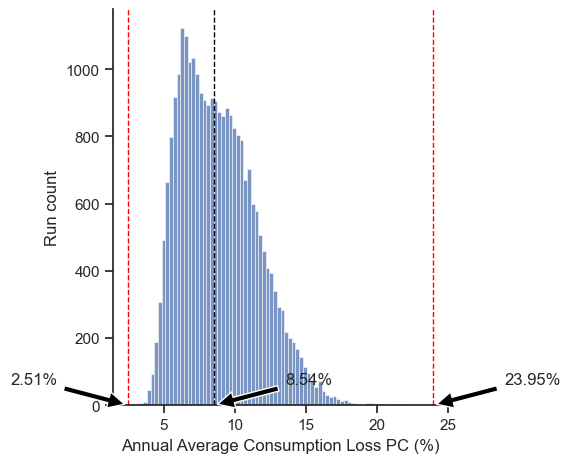

In [14]:
annotated_hist(outcomes, savefig)

In [15]:
# Print all outcomes for a single scenario
district = 'Dennery'
df = outcomes[outcomes['district'] == district].copy()
df.drop(columns=['years_in_poverty'], inplace=True)
columns_of_interest = ['total_consumption_loss', 
                       'n_affected_people', 'annual_average_consumption', 'n_new_poor', 'n_poor_affected',
                       'annual_average_consumption_loss', 'annual_average_consumption_loss_pct', 'r', 'n_new_poor_increase_pp']
# sns.pairplot(df[columns_of_interest])

### Multiple scenarios & multiple districts

In [16]:
# Let's aggregate across scenarios and take the mean
outcomes.iloc[:, 2:-1].groupby('district').mean(numeric_only=True).round(2)

,total_population,total_asset_loss,total_consumption_loss,tot_exposed_asset,tot_asset_surv,expected_loss_frac,n_affected_people,annual_average_consumption,poverty_line_adjusted,district_pml,...,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_average_consumption_loss,annual_average_consumption_loss_pct,mean_recovery_rate,r,n_new_poor_increase_pp
district,,,,,,,,,,,,,,,,,,,,,
Anse-La-Raye & Canaries,8666.91,1270937.52,789722.66,4.744218e+07,3.343312e+08,0.03,813.41,1591.22,914.27,1282936.18,...,303.88,8.92,32.85,33.32,33.26,100.25,6.99,0.15,0.27,0.10
Castries,70959.09,31002211.14,22356466.01,1.587406e+09,3.435721e+09,0.02,4181.27,6213.45,2976.86,31062668.40,...,935.76,190.42,34.78,35.07,34.76,555.22,8.57,0.18,2.74,0.27
Choiseul,5475.87,1111672.14,881561.84,5.435480e+07,3.778902e+08,0.02,373.11,1932.86,926.75,1111847.84,...,63.61,35.99,26.55,27.24,26.74,242.18,12.71,0.22,0.36,0.66
Dennery,11590.78,2661935.28,1800903.36,1.253726e+08,4.175284e+08,0.02,755.03,3383.57,1934.66,2667414.34,...,342.67,8.00,23.52,23.76,23.74,251.95,6.96,0.17,1.14,0.07
Gros Islet,27467.06,10861767.64,8479973.05,5.320618e+08,3.294339e+09,0.02,2105.27,2841.95,1040.60,10932607.53,...,204.18,105.80,15.39,15.63,15.43,419.65,11.04,0.20,0.94,0.39
Laborie,6828.32,2034941.68,1444079.00,9.923570e+07,2.156950e+08,0.02,416.25,5123.26,2964.26,2035118.22,...,98.13,13.13,23.26,23.54,23.40,360.61,6.49,0.18,2.48,0.19
Micoud,17435.51,4767004.48,3366943.11,2.319952e+08,5.540204e+08,0.02,1094.11,6056.25,2698.00,4766541.74,...,348.16,10.97,38.18,38.42,38.36,320.57,6.63,0.19,1.69,0.06
Soufriere,8985.05,1676753.60,1264334.97,8.275671e+07,5.359284e+08,0.02,606.83,2953.40,994.91,1679254.31,...,151.84,32.48,31.47,31.86,31.58,215.43,10.59,0.23,0.49,0.36
Vieuxfort,15229.37,4231569.73,2947342.80,2.165346e+08,1.266550e+09,0.02,1378.08,2121.05,1101.52,4264030.49,...,447.52,125.14,23.35,24.02,23.55,237.46,9.75,0.18,0.60,0.82


c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


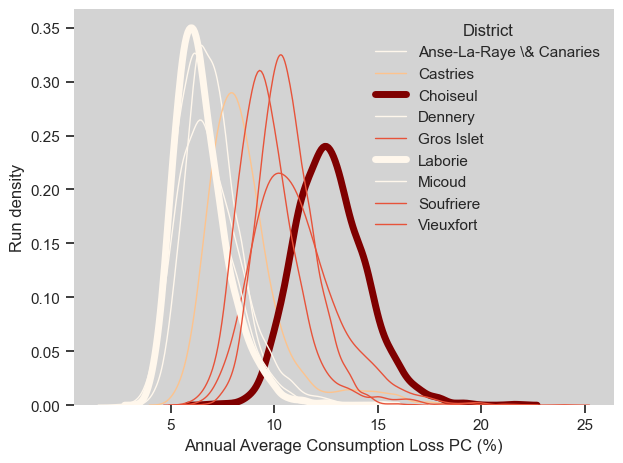

In [18]:
coloured_density_plots(outcomes, savefig, scheme='fisher_jenks', k=4)

In [11]:
tab = outcomes.iloc[:, 2:-1].groupby('district').describe().round(2)
column = 'n_new_poor'
tab = tab.sort_values(by=(column, 'mean'), ascending=False)
tab[[column]].iloc[:,1:].style.format("{:,.2f}")

## Weeks in poverty & Number of new poor

In [23]:
average_years_in_poverty = get_weeks_in_poverty_tab(outcomes)

if savetab:
    average_years_in_poverty.rename({'Anse-La-Raye & Canaries': 'Anse-La-Raye \& Canaries'}, inplace=True, axis=0)
    average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')\
        .to_latex(f'../reports/tables/av_years_in_pov.tex',
                  # escape=False,
                  caption='Average Years in Poverty By District',
                  label='tab:av_years_in_pov',
                  convert_css=True,
                  multicol_align="|c|",
                  hrules=True,
                  position_float="centering")

In [24]:
# Number of people in poverty for 1 / 3 / 5 years

In [25]:
# More than 1 year in poverty
n_years = 1
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

District
Anse-La-Raye & Canaries      8.904000
Castries                   190.380000
Choiseul                    35.955667
Dennery                      7.996667
Gros Islet                 105.784000
Laborie                     13.146667
Micoud                      10.987333
Soufriere                   32.465333
Vieuxfort                  125.127667
dtype: float64

In [26]:
# More than 3 years in poverty
n_years = 3
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

District
Anse-La-Raye & Canaries      8.904000
Castries                   155.480333
Choiseul                    34.885333
Dennery                      7.996667
Gros Islet                 101.196000
Laborie                     13.146667
Micoud                       8.636667
Soufriere                   32.465333
Vieuxfort                  122.096667
dtype: float64

In [27]:
# More than 1 year in poverty
n_years = 5
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

District
Anse-La-Raye & Canaries     5.957667
Castries                   92.684000
Choiseul                   28.397333
Dennery                     5.602667
Gros Islet                 57.576667
Laborie                     2.287667
Micoud                      2.673333
Soufriere                  24.000000
Vieuxfort                   4.647000
dtype: float64

In [28]:
average_years_in_poverty.round(2)

,0,1,2,3,4,5,6,7,8,9,10
District,,,,,,,,,,,
Anse-La-Raye & Canaries,0.0,0.00,0.00,0.57,2.37,2.70,3.14,0.05,0.00,0.00,0.07
Castries,0.0,13.01,21.89,18.74,44.05,32.52,13.86,2.71,21.77,5.62,16.21
Choiseul,0.0,0.00,1.07,3.09,3.40,9.64,13.06,4.04,0.31,0.65,0.70
Dennery,0.0,0.00,0.00,0.00,2.39,5.60,0.00,0.00,0.00,0.00,0.00
Gros Islet,0.0,2.81,1.77,13.21,30.41,25.50,11.60,6.02,13.01,1.44,0.00
Laborie,0.0,0.00,0.00,1.50,9.35,0.88,0.20,1.21,0.00,0.00,0.00
Micoud,0.0,1.07,1.28,1.07,4.89,1.13,0.24,0.00,0.00,0.13,1.18
Soufriere,0.0,0.00,0.00,4.84,3.62,1.68,8.49,12.33,1.50,0.00,0.00
Vieuxfort,0.0,0.49,2.55,69.37,48.08,0.00,3.24,1.11,0.30,0.00,0.00


In [29]:
average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')

,0,1,2,3,4,5,6,7,8,9,10
District,,,,,,,,,,,
Anse-La-Raye & Canaries,0,0,0,0,2,2,3,0,0,0,0
Castries,0,13,21,18,44,32,13,2,21,5,16
Choiseul,0,0,1,3,3,9,13,4,0,0,0
Dennery,0,0,0,0,2,5,0,0,0,0,0
Gros Islet,0,2,1,13,30,25,11,6,13,1,0
Laborie,0,0,0,1,9,0,0,1,0,0,0
Micoud,0,1,1,1,4,1,0,0,0,0,1
Soufriere,0,0,0,4,3,1,8,12,1,0,0
Vieuxfort,0,0,2,69,48,0,3,1,0,0,0


In [30]:
# Get the number of new poor in each district
districts = outcomes['district'].unique().tolist()
n_districts = len(districts)
d = {}
for district in districts:
    df = outcomes[outcomes['district'] == district]
    d[district] = df['n_new_poor'].values.tolist()

In [31]:
# Make a coloured table
tab = pd.DataFrame(d).describe().T.sort_values('mean', ascending=False).round(2).drop('count', axis=1)
tab.style.background_gradient(cmap='Blues', subset=['mean'])\
         .background_gradient(cmap='Reds', subset=['std'])\
         .background_gradient(cmap='Greens', subset=['min'])\
         .background_gradient(cmap='Greens', subset=['25%'])\
         .background_gradient(cmap='Greens', subset=['50%'])\
         .background_gradient(cmap='Greens', subset=['75%'])\
         .background_gradient(cmap='Greens', subset=['max'])\
         .format(decimal='.', thousands=',', precision=0)

,mean,std,min,25%,50%,75%,max
Castries,190,203,0,0,120,287,"1,495"
Vieuxfort,125,147,0,0,72,202,672
Gros Islet,106,111,0,0,77,174,694
Choiseul,36,26,0,15,33,51,197
Soufriere,32,35,0,4,23,50,225
Laborie,13,18,0,0,5,22,112
Micoud,11,20,0,0,0,14,358
Anse-La-Raye & Canaries,9,10,0,0,6,13,77
Dennery,8,19,0,0,0,0,120


## Average vulnerability

In [29]:
vulnerability_by_quintile = get_average_weighted_vulnerability(outcomes, quintile=True)
vulnerability_by_quintile.T.style.format("{:.2f}")

District,Anse-La-Raye & Canaries,Castries,Choiseul,Dennery,Gros Islet,Laborie,Micoud,Soufriere,Vieuxfort
Quintile,,,,,,,,,
1,0.51,0.48,0.40,0.53,0.38,0.42,0.46,0.33,0.47
2,0.46,0.43,0.33,0.46,0.40,0.43,0.40,0.40,0.39
3,0.42,0.41,0.34,0.38,0.38,0.36,0.34,0.32,0.40
4,0.43,0.40,0.32,0.40,0.36,0.37,0.34,0.35,0.37
5,0.35,0.33,0.32,0.38,0.33,0.37,0.33,0.28,0.35


In [30]:
vulnerability_by_decile = get_average_weighted_vulnerability(outcomes, quintile=False)
vulnerability_by_decile.T.style.format("{:.2f}")

District,Anse-La-Raye & Canaries,Castries,Choiseul,Dennery,Gros Islet,Laborie,Micoud,Soufriere,Vieuxfort
Decile,,,,,,,,,
1,0.51,0.45,0.43,0.40,0.15,0.35,0.44,0.27,0.47
2,0.50,0.35,0.33,0.54,0.32,0.36,0.44,0.31,0.44
3,0.46,0.42,0.32,0.44,0.39,0.41,0.25,0.31,0.42
4,0.42,0.36,0.29,0.33,0.33,0.41,0.35,0.44,0.36
5,0.45,0.39,0.33,0.39,0.39,0.30,0.31,0.29,0.41
6,0.12,0.38,0.31,0.26,0.30,0.37,0.32,0.29,0.37
7,0.44,0.41,0.33,0.36,0.35,0.34,0.33,0.39,0.31
8,0.30,0.38,0.29,0.37,0.34,0.33,0.30,0.31,0.38
9,0.32,0.33,0.32,0.39,0.35,0.36,0.36,0.27,0.35


## Raincloud plots

Raincloud plot is a combination of a boxplot, a kernel density plot, and a dot plot. It is a great way to visualize the distribution of the data. Especially, when the distribution is skewed and you have a lot of data points.

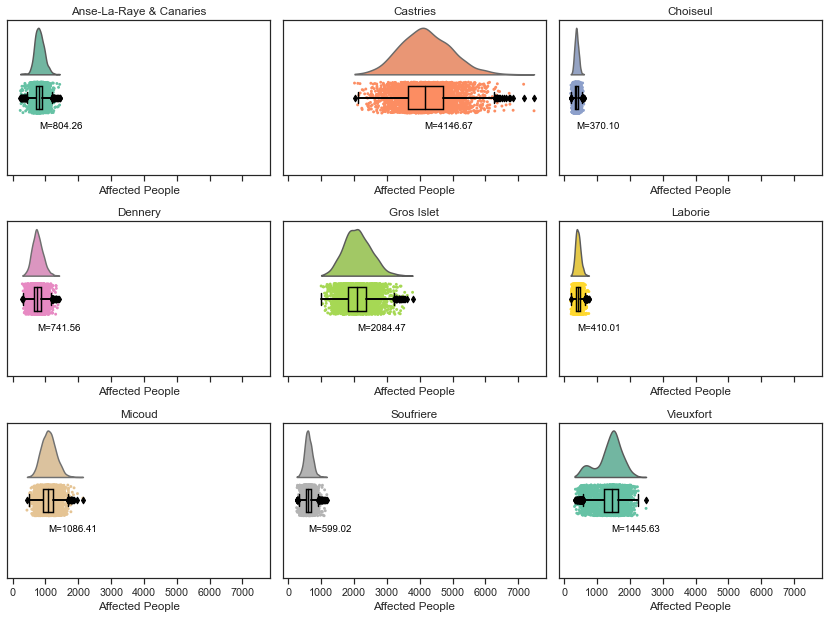

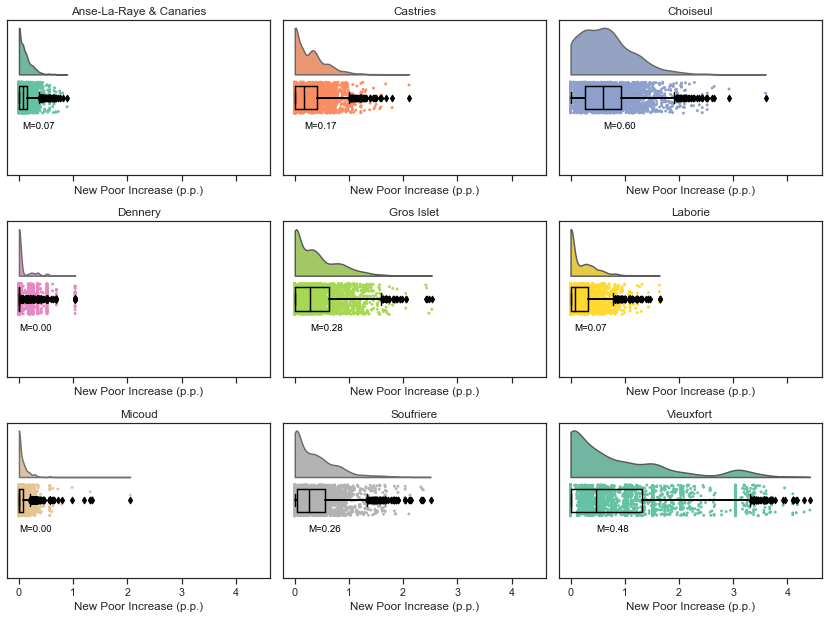

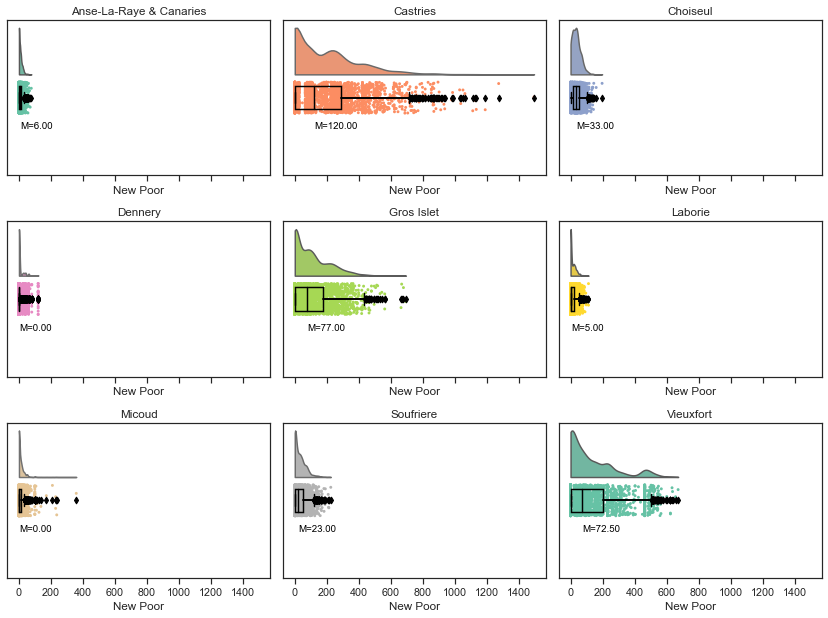

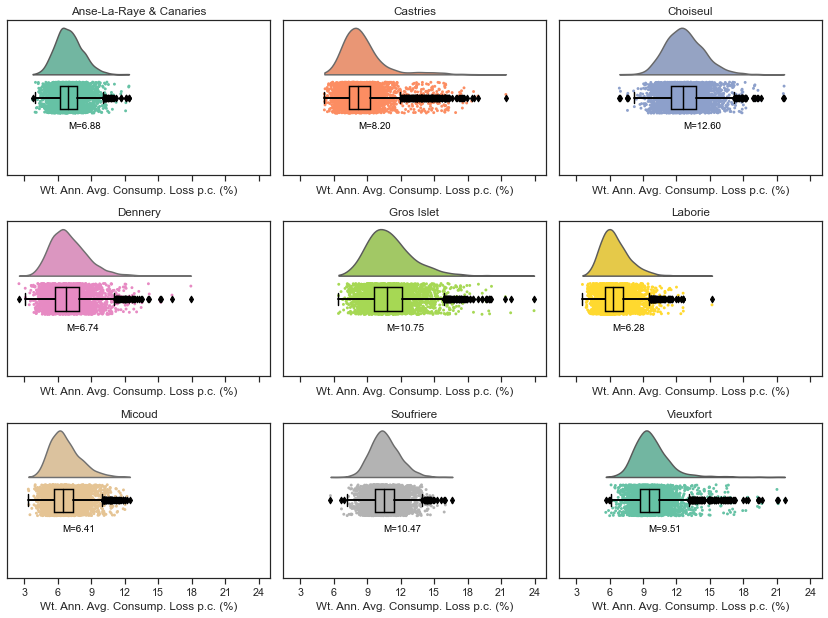

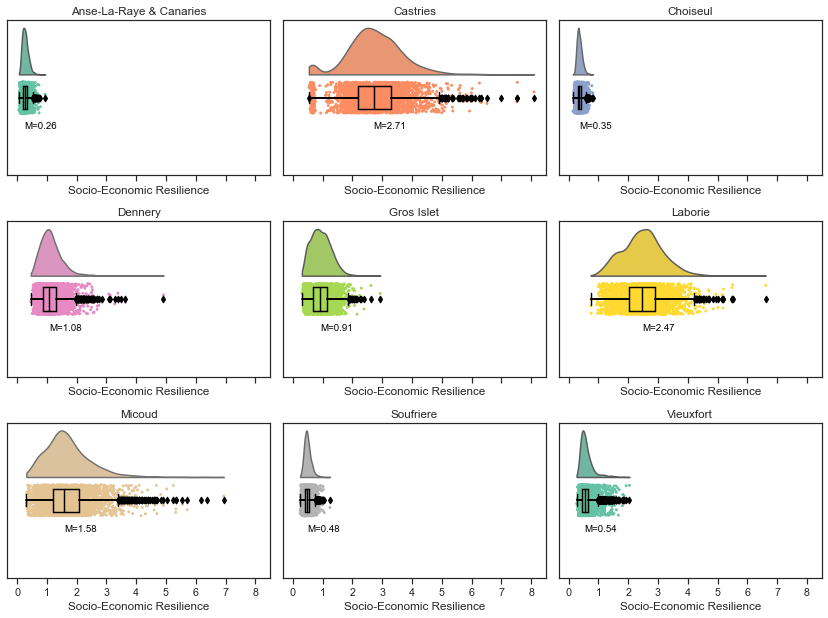

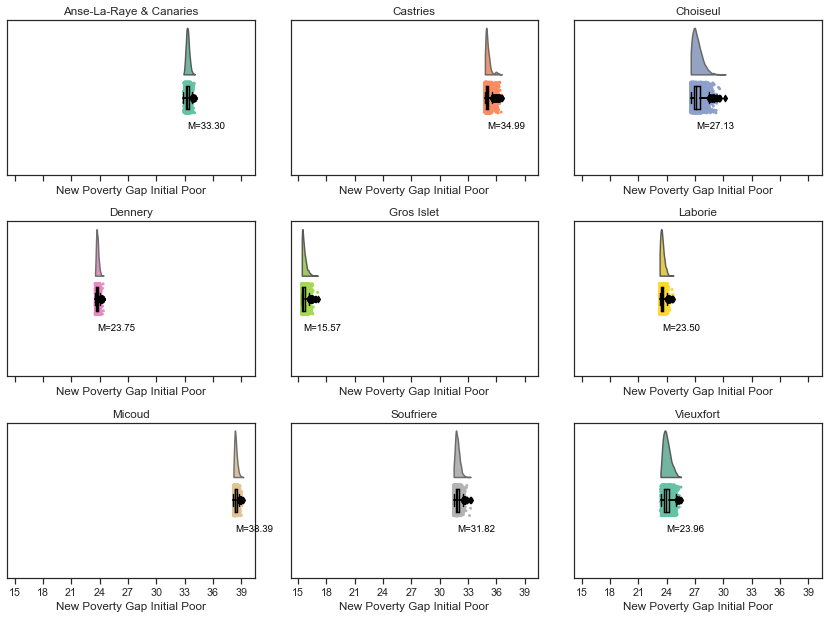

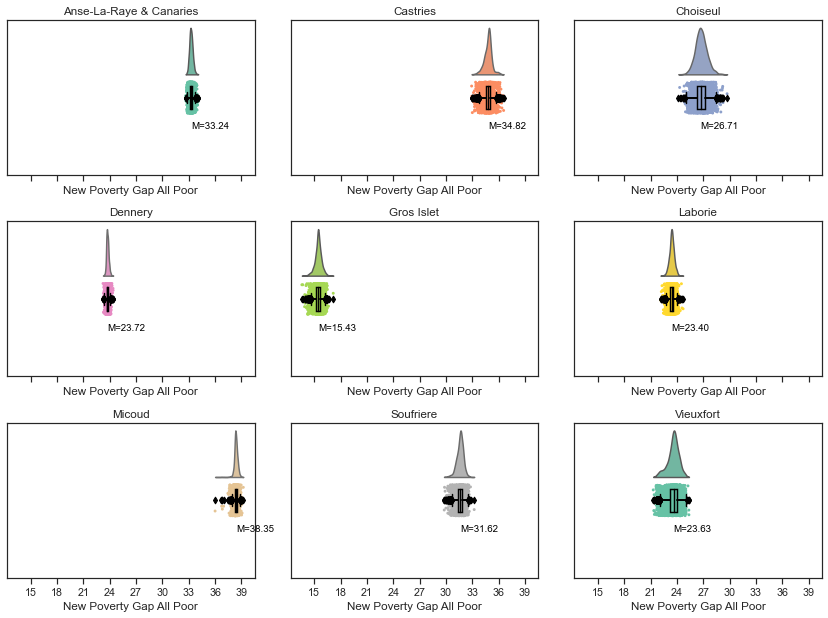

In [31]:
raincloud_plot(outcomes, savefig=savefig)

## Outcomes spatially

Another way to visualize the outcomes is to use choropleth maps. These maps are useful when you have data that is aggregated by a geographic area. For example, if we have data on how many people became poor after a disaster in the districts of Saint Lucia, we could use a choropleth map to show these numbers.  

What is important to remember is that **these maps do not show the variance** within each district. Instead, they show the mean or median value for each district.

In [6]:
# Get the country shapefile and aggregated outcomes
country = gpd.read_file('../data/raw/shapefiles/Saint Lucia/gadm36_LCA_shp/gadm36_LCA_0.shp')
aggregation = 'median'
outcomes['district'].replace({'Anse-La-Raye \& Canaries' : 'Anse-La-Raye & Canaries'}, inplace=True)
aggregated_outcomes = get_spatial_outcomes(outcomes, aggregation=aggregation)

# Convert to be in millions
aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss']] /= 1000000
aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss']] = aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss']].round(2)

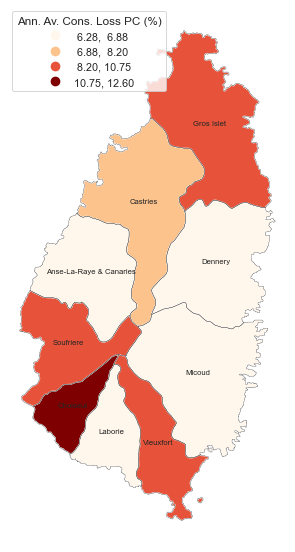

In [9]:
k = 4

column = 'annual_average_consumption_loss_pct'
title = 'Ann. Av. Cons. Loss PC (%)'
cmap = 'OrRd'

scheme = 'fisher_jenks'
ax = aggregated_outcomes.plot(column=column, scheme=scheme, k=k, cmap=cmap, legend=True, figsize=(10,10), legend_kwds={"title":title, "loc" : "upper left"})
aggregated_outcomes.plot(ax=ax, color='none', edgecolor='black', linewidth=0.25)
ax.axis('off')
for idx, row in aggregated_outcomes.iterrows():
    ax.annotate(text=row['NAME_1'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)
if savefig:
    plt.savefig(f'../reports/figures/analysis/soc_econ_res_map.png', dpi=300, bbox_inches='tight')

c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(
c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarni

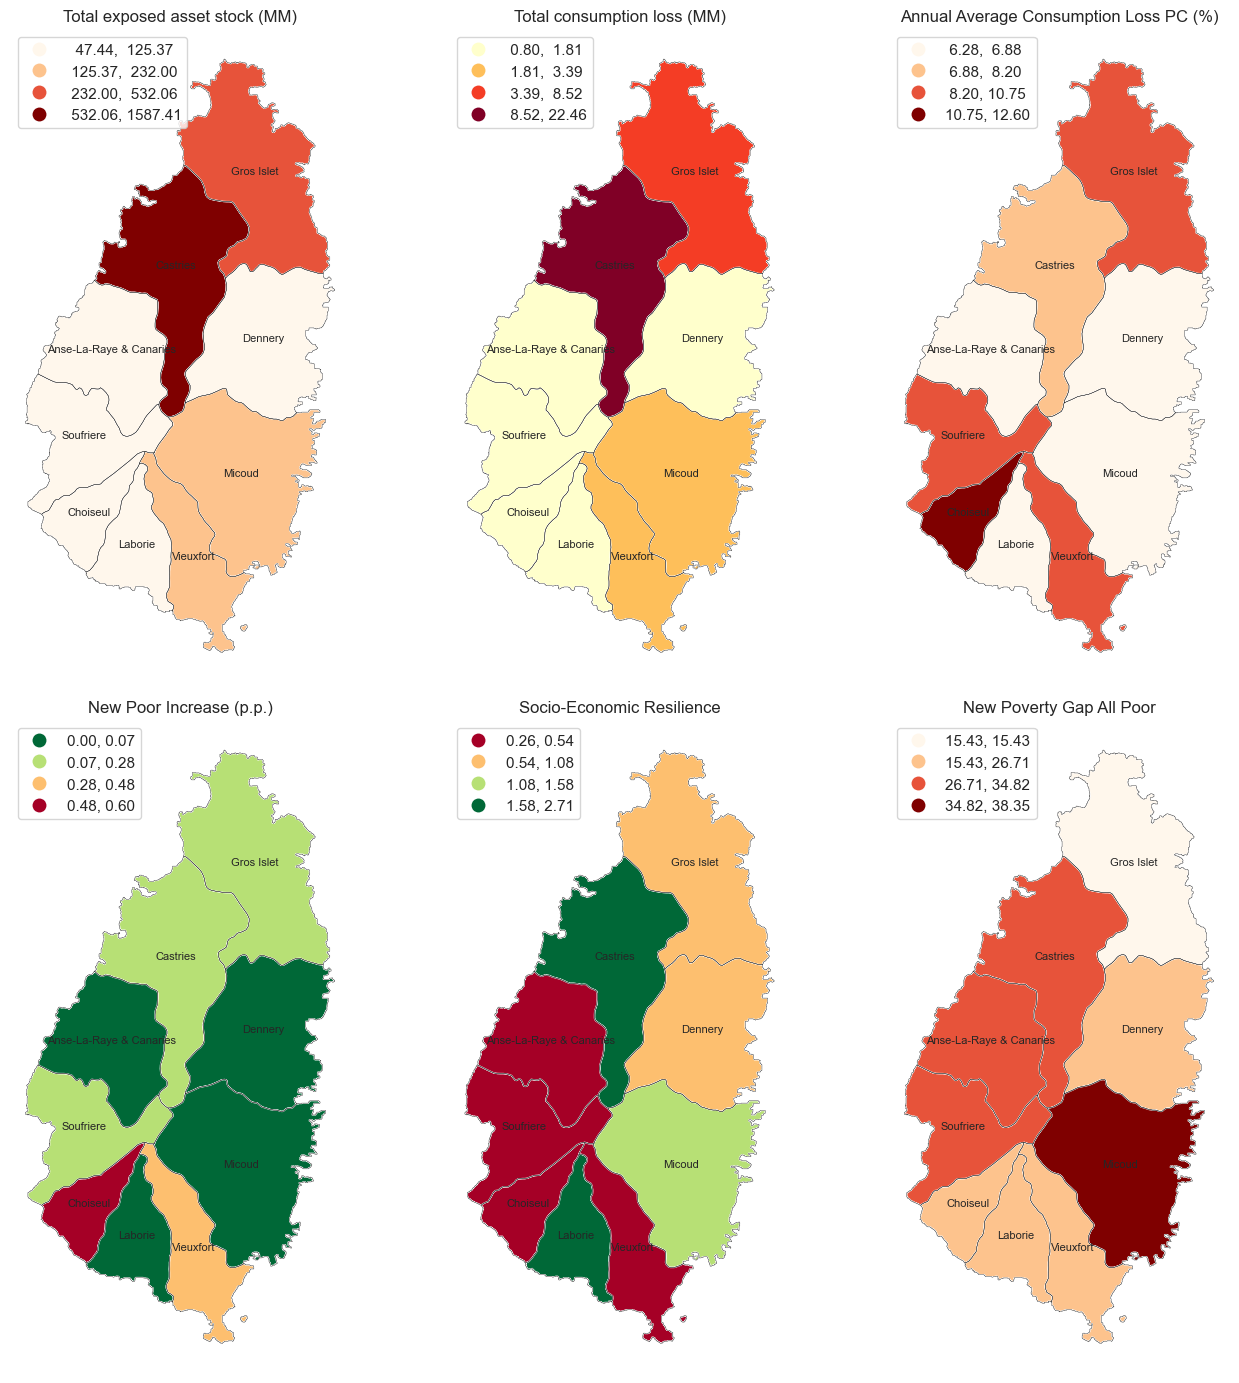

In [22]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 14))

outcomes_to_plot = [
    'tot_exposed_asset',
    'total_consumption_loss',
    'annual_average_consumption_loss_pct',
    'n_new_poor_increase_pp',
    'r',
    'new_poverty_gap_all']

titles = ['Total exposed asset stock (MM)',
          'Total consumption loss (MM)',
          # 'Wt. Ann. Avg. Consump. Loss p.c. (%)',
          'Annual Average Consumption Loss PC (%)',
          'New Poor Increase (p.p.)',
          'Socio-Economic Resilience',
          'New Poverty Gap All Poor']

cmaps = ['OrRd', 'YlOrRd', 'OrRd', 'RdYlGn_r', 'RdYlGn', 'OrRd']

k = 4
for i, outcome in enumerate(outcomes_to_plot):
    aggregated_outcomes.plot(column=outcome, scheme='fisher_jenks', cmap=cmaps[i], k=k, ax=ax[i//3, i % 3], legend=True, legend_kwds={"loc": "upper left"})
    aggregated_outcomes.plot(ax=ax[i//3, i % 3], color='none', edgecolor='black', linewidth=0.25)
    ax[i//3, i % 3].set_title(titles[i])
    ax[i//3, i % 3].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i//3, i % 3].annotate(text=row['NAME_1'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)

# fig.suptitle(f'{aggregation.capitalize()} of 3,000 replications', fontsize=16)

fig.tight_layout()
if savefig:
    plt.savefig(
        f'../reports/figures/analysis/{aggregation}_outcomes_spatially.png', dpi=300, bbox_inches='tight')

A bivariate or bi-variate choropleth helps to visualise relations between two variables spatially. 

In [37]:
# Load asset damage data
asset_damage = pd.read_excel('../data/processed/asset_damage/Saint Lucia.xlsx')
asset_damage['district'].replace({'AnseLaRayeCanaries' : 'Anse-La-Raye & Canaries'}, inplace=True)
gdf = pd.merge(aggregated_outcomes, asset_damage, left_on='NAME_1', right_on='district', how='left')

c:\Users\Mikhail\miniconda3\envs\unbreakable\lib\site-packages\mapclassify\classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


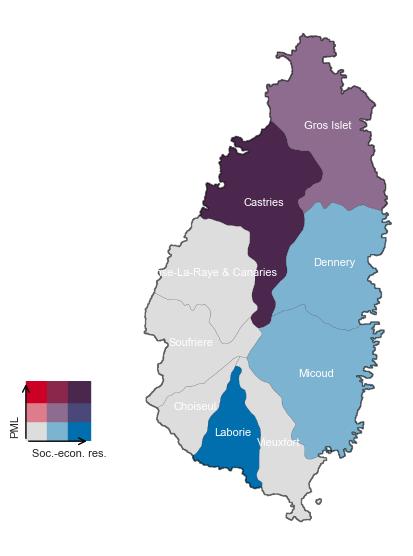

In [38]:
x_name = 'r'
y_name = 'pml'
x_label = 'Soc.-econ. res.'
y_label = 'PML'

tab = bivariate_choropleth(gdf.copy(), x_name, y_name, x_label, y_label, scheme='fisher_jenks', figsize=(7,6), return_table=True)
if savefig:
    plt.savefig('../reports/figures/analysis/bivariate_choropleth.png', dpi=300, bbox_inches='tight')

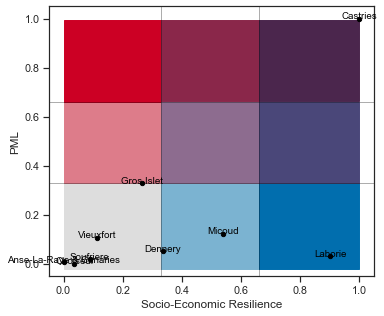

In [38]:
nine_quadrants_plot(gdf.copy(), x_name, y_name)
plt.xlabel('Socio-Economic Resilience')
plt.ylabel('PML')
if savefig:
    plt.savefig('../reports/figures/analysis/9_quadrants.png', dpi=300, bbox_inches='tight')